# S05 T01: Tasca mètodes de mostreig

## Exercici 1. Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

### Mostra Aleatòria Simple - Simple Random Sample

In [178]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

Carreguem les dades obtingudes a partir de la web bdfutbol.com, amb l'històric de jugadors de la selecció espanyola de futbol absolut masculina. Tenim diverses dades que ens permetran fer diversos anàlisis:
- Sobrenom; Nom; Data Naixement; Lloc de Naixament; Província; País; Partits Jugats; Partits Titular; Partits Complets; Partits Suplent; Partits Substituït; Partits Convocats (sense jugar); Partits Guanyats; Partits Empetats; Partits Perduts; Minuts; Goles; Gols Penalt; Goles pròpia porta; Gols Encaixats; Targetes grogues; Targetes vermelles; Edat inicial; Edat final; Alçada; Pes

In [179]:
#importem i li assignem un nom de dataframe
jugadors = pd.read_csv('C:\\Users\\Silvia\\Desktop\\rubenIT\\DataSources\\jugadores.csv', encoding='utf-16', sep=',')

In [180]:
#veiem capçalera, final i info del dataframe
print(jugadors.head(10))
print(jugadors.tail(10))
print(jugadors.info())

         Apodo                       Nombre       Fecha              Ciudad  \
0      Joaquín      Joaquín Jiménez Postigo  18/04/1918  Alcalá de Guadaíra   
1   Iñaki Peña        Ignacio Peña Sotorres  02/03/1999            Alicante   
2       Corona           José Llopis Corona  04/06/1918            Alicante   
3       Pesudo     José Manuel Pesudo Soler  11/06/1936           Almassora   
4        Botía  Alberto Tomás Botía Rabasco  27/01/1989           Alquerías   
5      Velasco        Juan Zambudio Velasco  25/11/1922           Alquerías   
6      Esnaola   José Ramón Esnaola Larburu  30/06/1946             Andoain   
7       Artola   Pedro María Artola Urrutia  06/09/1948             Andoain   
8  Sergi Gómez             Sergi Gómez Solà  28/03/1992       Arenys de Mar   
9      Esteban        Esteban Andrés Suárez  27/06/1975              Avilés   

   Provincia    País  PJ  PT  PC  PS  ...  G  GP  GPP  GE  TA  TR  EI  EF  \
0    Sevilla  España   0   0   0   0  ...  0   0    0

Es pot veure com que no hi ha dades nul·les.

In [181]:
#veiem els índex
jugadors.columns

Index(['Apodo', 'Nombre', 'Fecha', 'Ciudad', 'Provincia', 'País', 'PJ', 'PT',
       'PC', 'PS', 'PX', 'PG', 'PE', 'PP', 'Min', 'G', 'GP', 'GPP', 'GE', 'TA',
       'TR', 'EI', 'EF', 'Altura', 'Peso'],
      dtype='object')

In [182]:
#descrivim totes les dades
jugadors.describe(include = "all")

,Apodo,Nombre,Fecha,Ciudad,Provincia,País,PJ,PT,PC,PS,...,G,GP,GPP,GE,TA,TR,EI,EF,Altura,Peso
count,963,963,962,963,963,963,963.000000,963.000000,963.000000,963.000000,...,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,728.000000,725.000000
unique,880,963,952,439,54,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Rodri,Joaquín Jiménez Postigo,01/09/1959,Madrid,Bizkaia,España,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,2,74,114,916,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,10.466251,8.349948,6.211838,2.116303,...,1.497404,0.104881,0.015576,0.681205,0.623053,0.023884,20.788162,23.144341,177.679945,73.994483
std,NaN,NaN,NaN,NaN,NaN,NaN,19.467966,16.648096,12.332233,4.530903,...,4.421261,0.731250,0.123894,5.838179,2.038652,0.159426,8.394557,9.446586,6.038668,5.646343
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000,60.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,23.000000,173.000000,70.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,26.000000,178.000000,74.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,9.000000,6.000000,2.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,29.000000,182.000000,78.000000


In [183]:
#analitzem els jugadors que han debutat, aplicant una màscara i filtre posterior.
jugadors_mask=jugadors["PJ"]>0
jugadors_filtre=jugadors[jugadors_mask]
print(jugadors_filtre)

            Apodo                       Nombre       Fecha         Ciudad  \
123  Marcos Vales         Marcos Vales Illanes  05/04/1975       A Coruña   
124         Acuña              Juan Acuña Naya  13/02/1923       A Coruña   
125        Martín  José María Martín Rodríguez  25/04/1924       A Coruña   
126       Pedrito           Pedro López Crespo  18/03/1917       A Coruña   
127       Casilla     Francisco Casilla Cortés  02/10/1986        Alcover   
..            ...                          ...         ...            ...   
958       Iniesta         Andrés Iniesta Luján  11/05/1984  Fuentealbilla   
959      Busquets       Sergio Busquets Burgos  16/07/1988       Sabadell   
960          Xavi       Xavier Hernández Creus  25/01/1980       Terrassa   
961      Casillas      Iker Casillas Fernández  20/05/1981       Móstoles   
962  Sergio Ramos          Sergio Ramos García  30/03/1986          Camas   

     Provincia    País   PJ   PT   PC  PS  ...   G  GP  GPP  GE  TA  TR  EI

In [184]:
#analitzem el percentatge de NaN per cada un dels camps
(jugadors.isnull().sum())*100 / len(jugadors)

Apodo         0.000000
Nombre        0.000000
Fecha         0.103842
Ciudad        0.000000
Provincia     0.000000
País          0.000000
PJ            0.000000
PT            0.000000
PC            0.000000
PS            0.000000
PX            0.000000
PG            0.000000
PE            0.000000
PP            0.000000
Min           0.000000
G             0.000000
GP            0.000000
GPP           0.000000
GE            0.000000
TA            0.000000
TR            0.000000
EI            0.000000
EF            0.000000
Altura       24.402908
Peso         24.714434
dtype: float64

In [185]:
#llistem els valors nuls d'aquells jugadors que no tenen el camp "Fecha"
jugadors_null = jugadors[jugadors.Fecha.isnull()]
print(jugadors_null)

      Apodo                  Nombre Fecha      Ciudad   Provincia    País  PJ  \
115  Montes  Ángel Montes Rodríguez   NaN  Valladolid  Valladolid  España   0   

     PT  PC  PS  ...  G  GP  GPP  GE  TA  TR  EI  EF  Altura  Peso  
115   0   0   0  ...  0   0    0   0   0   0   0   0     NaN   NaN  

[1 rows x 25 columns]


In [186]:
#llistem els valors nuls d'aquells jugadors que no tenen el camp "Altura"
jugadors_null02 = jugadors[jugadors.Altura.isnull()]
print(jugadors_null02)

             Apodo                                             Nombre  \
0          Joaquín                            Joaquín Jiménez Postigo   
2           Corona                                 José Llopis Corona   
5          Velasco                              Juan Zambudio Velasco   
10          Casuco                           Julio Fernández Martínez   
14        Alcoriza                          Francisco Alcoriza Gimeno   
..             ...                                                ...   
826       Samitier                             Josep Samitier Vilalta   
854      Quincoces  Jacinto Francisco Fernández de Quincoces López...   
855        Segarra                              Joan Segarra Iracheta   
857  Luis Regueiro                               Luis Regueiro Pagola   
913         Zamora                            Ricardo Zamora Martínez   

          Fecha              Ciudad  Provincia    País  PJ  PT  PC  PS  ...  \
0    18/04/1918  Alcalá de Guadaíra    Sevil

In [187]:
#llistem els valors nuls d'aquells jugadors que no tenen el camp "Peso"
jugadors_null03 = jugadors[jugadors.Peso.isnull()]
print(jugadors_null03)

             Apodo                                             Nombre  \
0          Joaquín                            Joaquín Jiménez Postigo   
2           Corona                                 José Llopis Corona   
5          Velasco                              Juan Zambudio Velasco   
10          Casuco                           Julio Fernández Martínez   
14        Alcoriza                          Francisco Alcoriza Gimeno   
..             ...                                                ...   
826       Samitier                             Josep Samitier Vilalta   
854      Quincoces  Jacinto Francisco Fernández de Quincoces López...   
855        Segarra                              Joan Segarra Iracheta   
857  Luis Regueiro                               Luis Regueiro Pagola   
913         Zamora                            Ricardo Zamora Martínez   

          Fecha              Ciudad  Provincia    País  PJ  PT  PC  PS  ...  \
0    18/04/1918  Alcalá de Guadaíra    Sevil

Veiem que els nuls d'alçada i pes corresponen a registres de jugadors de la primera meitat del segle XX, i que només hi ha un jugador sense lloc de naixement. Per netejar el dataframe, farem el següent:
- Assignem una data de naixement pel jugador amb índex 115. És un jugador dels 1930, li posarem naixement 1/1/1910.
- Apliquem un filtre per evitar dades nul·les d'alçada i pes.

In [188]:
#assignem nova data i comprovem efectivitat
jugadors.loc[115, "Fecha"] = "1/1/1910"
print(jugadors_null)

      Apodo                  Nombre Fecha      Ciudad   Provincia    País  PJ  \
115  Montes  Ángel Montes Rodríguez   NaN  Valladolid  Valladolid  España   0   

     PT  PC  PS  ...  G  GP  GPP  GE  TA  TR  EI  EF  Altura  Peso  
115   0   0   0  ...  0   0    0   0   0   0   0   0     NaN   NaN  

[1 rows x 25 columns]


In [189]:
#apliquem 3 filtres per aplicar el mostreig
jugadors_filtre02=jugadors[(jugadors.PJ>0) & (jugadors.Altura>0)]
print(jugadors_filtre02)

            Apodo                       Nombre       Fecha         Ciudad  \
123  Marcos Vales         Marcos Vales Illanes  05/04/1975       A Coruña   
124         Acuña              Juan Acuña Naya  13/02/1923       A Coruña   
125        Martín  José María Martín Rodríguez  25/04/1924       A Coruña   
127       Casilla     Francisco Casilla Cortés  02/10/1986        Alcover   
128  Juan Sánchez    Juan Ginés Sánchez Romero  15/05/1972         Aldaia   
..            ...                          ...         ...            ...   
958       Iniesta         Andrés Iniesta Luján  11/05/1984  Fuentealbilla   
959      Busquets       Sergio Busquets Burgos  16/07/1988       Sabadell   
960          Xavi       Xavier Hernández Creus  25/01/1980       Terrassa   
961      Casillas      Iker Casillas Fernández  20/05/1981       Móstoles   
962  Sergio Ramos          Sergio Ramos García  30/03/1986          Camas   

     Provincia    País   PJ   PT   PC  PS  ...   G  GP  GPP  GE  TA  TR  EI

Iniciem el primer mostreig. Escollirem per fer el mostreig i les comparacions les dades de Jugador, Partits Jugats PJ, Partits Guanyats PG, Gols G, Alçada i Pes.

In [190]:
#Imprimim les dades filtrades
print(jugadors_filtre02.describe())
print(jugadors_filtre02.head(10))
print(jugadors_filtre02.tail(10))

               PJ          PT          PC          PS          PX          PG  \
count  656.000000  656.000000  656.000000  656.000000  656.000000  656.000000   
mean    14.140244   11.079268    8.006098    3.060976    3.050305    8.381098   
std     22.428618   19.301777   14.250109    5.224657    7.106103   15.307970   
min      1.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    1.000000    0.000000    0.000000    1.000000   
50%      5.000000    4.000000    3.000000    1.000000    1.000000    3.000000   
75%     16.000000   12.000000    9.000000    3.000000    3.000000    9.000000   
max    180.000000  161.000000  125.000000   42.000000   59.000000  131.000000   

               PE          PP           Min           G          GP  \
count  656.000000  656.000000    656.000000  656.000000  656.000000   
mean     3.326220    2.432927   1004.806402    1.963415    0.143293   
std      4.825851    3.603020   1667.471888    5.158721  

Cuando se conoce o se supone la desviación estándar de la población
La fórmula para calcular el tamaño de la muestra cuando se conoce o se supone la desviación estándar de la población es:

n=(N*sigma^2*Z-alfa^2)/[e^2*(N-1)+(sigma^2*Z-alfa^2)]

N = tamaño de la población.

{\displaystyle \sigma }\sigma= Desviación estándar de la población, que generalmente cuando no se tiene su valor, suele utilizarse un valor estimado a ojo o a partir de una pequeña muestra o muestra piloto. Para ser conservador (prudente), mejor errar estimando por exceso que por defecto.

Zα: Valor obtenido mediante niveles de confianza. Es un valor constante que, si no se tiene su valor, se lo toma en relación al 95% de confianza equivale a 1,96 (como más usual) o en relación al 99% de confianza equivale 2,58, valor que queda a criterio del encuestador.

e = Límite aceptable de error muestral que, generalmente cuando no se tiene su valor, suele utilizarse un valor que varía entre el 1% (0,01) y 9% (0,09), valor que queda a criterio del encuestad

In [191]:
A=(len(jugadors_filtre02)*np.square(jugadors_filtre02.PG.std())*np.square(1.28))

In [192]:
B=(np.square(0.09)*(len(jugadors_filtre02)-1)+(np.square(jugadors_filtre02.PG.std())*np.square(1.28)))

In [193]:
C=A/B
print(C)

647.0584113538185


In [194]:
#Escollim la k o mostreig en funció de l'apunt esmentat en el punt anterior, amb z=1,28 (80%) i e=0,09 (9%), 
#i en funció dels Partits Guanyats, que tenen més desviació:
k=(len(jugadors_filtre02)*np.square(jugadors_filtre02.PG.std())*np.square(1.28))/(np.square(0.09)*(len(jugadors_filtre02)-1)+(np.square(jugadors_filtre02.PG.std())*np.square(1.28)))
print(k)

647.0584113538185


Com que una mostra de 647 sembla molt propera a la població, farem l'exercici amb un valor de 100 individus.

In [195]:
#Apliquem Simple Random Sample
k = 100
srSample = jugadors_filtre02.sample(k)
srSample.shape

(100, 25)

In [196]:
srSample.head()

,Apodo,Nombre,Fecha,Ciudad,Provincia,País,PJ,PT,PC,PS,...,G,GP,GPP,GE,TA,TR,EI,EF,Altura,Peso
437,Biosca,Antonio Biosca Pérez,08/12/1948,Almería,Almería,España,3,2,2,1,...,0,0,0,0,0,0,29,29,173.0,73.0
255,Valero,Antonio Valero Yubero,31/03/1932,Madrid,Madrid,España,1,1,1,0,...,0,0,0,0,0,0,24,24,172.0,72.0
252,De Felipe,Pedro Eugenio de Felipe Cortés,18/07/1944,Madrid,Madrid,España,1,1,1,0,...,0,0,0,0,0,0,29,29,178.0,81.0
306,Nimo,José Ramón Nimo Maldonado,11/07/1959,Sevilla,Sevilla,España,1,1,0,0,...,0,0,0,0,0,0,24,24,177.0,74.0
746,Guti,José María Gutiérrez Hernández,31/10/1976,Torrejón de Ardoz,Madrid,España,13,4,0,9,...,3,0,0,0,0,0,22,28,181.0,76.0


In [197]:
srSample.describe()

,PJ,PT,PC,PS,PX,PG,PE,PP,Min,G,GP,GPP,GE,TA,TR,EI,EF,Altura,Peso
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.00000,100.000000,100.00000,100.00000
mean,13.75000,10.100000,7.110000,3.650000,2.990000,8.150000,3.200000,2.400000,940.840000,1.820000,0.050000,0.030000,0.230000,0.920000,0.01,24.24000,26.800000,177.20000,73.43000
std,20.14963,16.973836,12.973863,5.878183,5.623714,13.153618,4.442676,3.848127,1506.565207,4.164254,0.261116,0.171447,1.246044,2.852183,0.10,2.89939,3.428932,6.27324,5.98526
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,18.00000,18.000000,165.00000,60.00000
25%,2.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,22.00000,24.000000,172.00000,69.75000
50%,4.50000,3.000000,2.000000,1.000000,0.000000,3.000000,1.000000,1.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,24.00000,27.000000,177.00000,73.50000
75%,18.00000,12.250000,8.000000,4.000000,4.000000,9.000000,4.250000,3.000000,1235.250000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00,27.00000,29.250000,181.00000,77.00000
max,133.00000,119.000000,89.000000,29.000000,30.000000,94.000000,24.000000,21.000000,10570.000000,27.000000,2.000000,1.000000,9.000000,23.000000,1.00,31.00000,34.000000,191.00000,90.00000


In [198]:
#Acotem l'estudi a les columnes escollides i visualitzem el resultat
jugadors_filtre03=jugadors_filtre02.iloc[:,[1,7,11,15,23,24]]
print(jugadors_filtre03.head())
print(jugadors_filtre03.describe())
print(jugadors_filtre03.info())

                          Nombre  PT  PG  G  Altura  Peso
123         Marcos Vales Illanes   0   1  0   181.0  77.0
124              Juan Acuña Naya   0   1  0   179.0  88.0
125  José María Martín Rodríguez   1   1  0   176.0  74.0
127     Francisco Casilla Cortés   0   0  0   192.0  83.0
128    Juan Ginés Sánchez Romero   0   0  0   173.0  72.0
               PT          PG           G      Altura        Peso
count  656.000000  656.000000  656.000000  656.000000  654.000000
mean    11.079268    8.381098    1.963415  177.608232   73.915902
std     19.301777   15.307970    5.158721    6.033787    5.713472
min      0.000000    0.000000    0.000000  160.000000   60.000000
25%      1.000000    1.000000    0.000000  173.000000   70.000000
50%      4.000000    3.000000    0.000000  178.000000   74.000000
75%     12.000000    9.000000    1.000000  182.000000   77.000000
max    161.000000  131.000000   59.000000  197.000000   95.000000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entr

In [199]:
#Comparem amb les dades de la mostra amb les de tota la població
srSample02=srSample.iloc[:,[1,7,11,15,23,24]]
print(srSample02.head())
print(srSample02.info())
print(srSample02.describe())

                             Nombre  PT  PG  G  Altura  Peso
437            Antonio Biosca Pérez   2   2  0   173.0  73.0
255           Antonio Valero Yubero   1   1  0   172.0  72.0
252  Pedro Eugenio de Felipe Cortés   1   0  0   178.0  81.0
306       José Ramón Nimo Maldonado   1   0  0   177.0  74.0
746  José María Gutiérrez Hernández   4   9  3   181.0  76.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 437 to 621
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  100 non-null    object 
 1   PT      100 non-null    int64  
 2   PG      100 non-null    int64  
 3   G       100 non-null    int64  
 4   Altura  100 non-null    float64
 5   Peso    100 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB
None
               PT          PG           G     Altura       Peso
count  100.000000  100.000000  100.000000  100.00000  100.00000
mean    10.100000    8.150000    1.82

S'observa que les dades d'Alçada i Pes pràcticament no tenen variació, però sí les dades estadístiques de les mitjanes i desviacions estàndards dels partits jugats, guanyats i gols.

Fem una comparativa visual per constatar les dades.

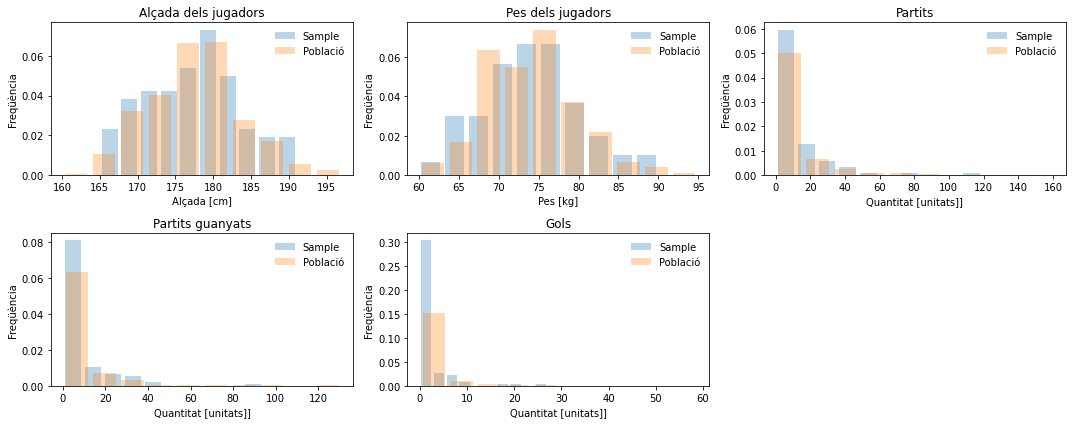

In [200]:
# Comparatives visuals
fig=plt.figure(figsize=(15, 6))

ax = plt.subplot(2, 3, 1)
srSample02["Altura"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Altura"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Alçada dels jugadors")
plt.ylabel("Freqüència")
plt.xlabel("Alçada [cm]")

ax = plt.subplot(2, 3, 2)
srSample02["Peso"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Peso"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Pes dels jugadors")
plt.ylabel("Freqüència")
plt.xlabel("Pes [kg]")

ax = plt.subplot(2, 3, 3)
srSample02["PT"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PT"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 4)
srSample02["PG"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PG"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits guanyats")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 5)
srSample02["G"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["G"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Gols")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

plt.subplots_adjust(wspace=0.85, hspace=0.5, bottom=0.1)

fig.tight_layout()
plt.show()

Els gràfics ens mostren una distribució R en l'alçada i el pes, i una representació molt similar. El contrari passa amb els partits i gols, tal i com s'havia avançat numèricament.

### Mostra Aleatòria Sistemàtica - Systematic Random Sample
Fixem random.seed per tal de crear una aleatorietat sistemàtica.

In [201]:
#Comparem amb les dades de la mostra amb les de tota la població
random.seed(5) #fixem els valors random
srSample03=srSample.iloc[:,[1,7,11,15,23,24]]
print(srSample03.head())
print(srSample03.info())
print(srSample03.describe())

                             Nombre  PT  PG  G  Altura  Peso
437            Antonio Biosca Pérez   2   2  0   173.0  73.0
255           Antonio Valero Yubero   1   1  0   172.0  72.0
252  Pedro Eugenio de Felipe Cortés   1   0  0   178.0  81.0
306       José Ramón Nimo Maldonado   1   0  0   177.0  74.0
746  José María Gutiérrez Hernández   4   9  3   181.0  76.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 437 to 621
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  100 non-null    object 
 1   PT      100 non-null    int64  
 2   PG      100 non-null    int64  
 3   G       100 non-null    int64  
 4   Altura  100 non-null    float64
 5   Peso    100 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 5.5+ KB
None
               PT          PG           G     Altura       Peso
count  100.000000  100.000000  100.000000  100.00000  100.00000
mean    10.100000    8.150000    1.82

In [202]:
print(jugadors_filtre03.head())
print(jugadors_filtre03.describe())

                          Nombre  PT  PG  G  Altura  Peso
123         Marcos Vales Illanes   0   1  0   181.0  77.0
124              Juan Acuña Naya   0   1  0   179.0  88.0
125  José María Martín Rodríguez   1   1  0   176.0  74.0
127     Francisco Casilla Cortés   0   0  0   192.0  83.0
128    Juan Ginés Sánchez Romero   0   0  0   173.0  72.0
               PT          PG           G      Altura        Peso
count  656.000000  656.000000  656.000000  656.000000  654.000000
mean    11.079268    8.381098    1.963415  177.608232   73.915902
std     19.301777   15.307970    5.158721    6.033787    5.713472
min      0.000000    0.000000    0.000000  160.000000   60.000000
25%      1.000000    1.000000    0.000000  173.000000   70.000000
50%      4.000000    3.000000    0.000000  178.000000   74.000000
75%     12.000000    9.000000    1.000000  182.000000   77.000000
max    161.000000  131.000000   59.000000  197.000000   95.000000


Les diferències més destacables les trobem en els partits i els gols, amb diferència escasa en el pes i l'alçada.

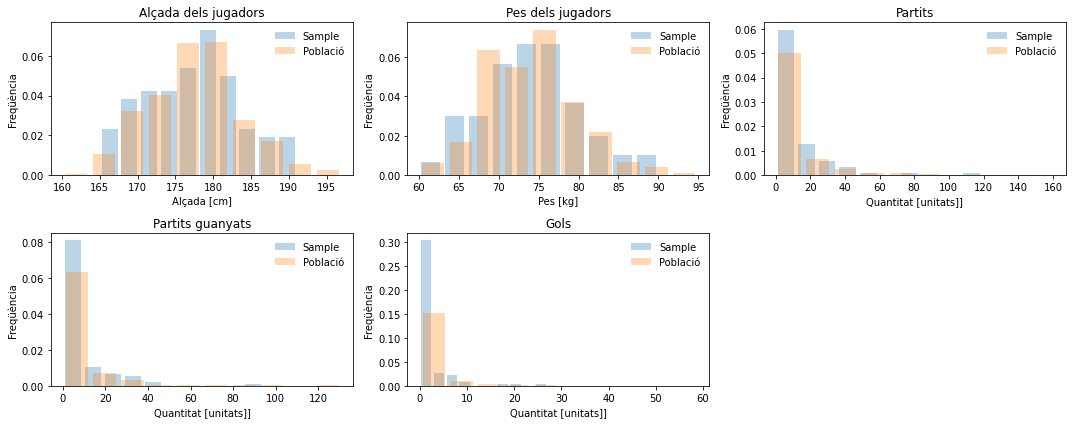

In [203]:
# Comparatives visuals
fig=plt.figure(figsize=(15, 6))

ax = plt.subplot(2, 3, 1)
srSample03["Altura"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Altura"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Alçada dels jugadors")
plt.ylabel("Freqüència")
plt.xlabel("Alçada [cm]")

ax = plt.subplot(2, 3, 2)
srSample03["Peso"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Peso"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Pes dels jugadors")
plt.ylabel("Freqüència")
plt.xlabel("Pes [kg]")

ax = plt.subplot(2, 3, 3)
srSample03["PT"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PT"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 4)
srSample03["PG"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PG"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits guanyats")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 5)
srSample03["G"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["G"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Gols")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

plt.subplots_adjust(wspace=0.85, hspace=0.5, bottom=0.1)

fig.tight_layout()
plt.show()

El mateix que en el cas anterior succeeix: les diferències més destacables les trobem en els partits i els gols, amb diferència escasa en el pes i l'alçada. Sobre tot en Gols, a on la població es distribueix entre 0-5 gols, i la mostra en 1 gol.

## Exercici 2. Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

### Mostra estratificada
Generem una estratificació per Província, i després aplicarem posteriorment una Mostra Aleatòria Simple.

In [204]:
jugadors_filtre04=jugadors_filtre02.iloc[:,[1,4,7,11,15,23,24]]
print(jugadors_filtre04.head(10))

                          Nombre  Provincia  PT  PG  G  Altura  Peso
123         Marcos Vales Illanes   A Coruña   0   1  0   181.0  77.0
124              Juan Acuña Naya   A Coruña   0   1  0   179.0  88.0
125  José María Martín Rodríguez   A Coruña   1   1  0   176.0  74.0
127     Francisco Casilla Cortés  Tarragona   0   0  0   192.0  83.0
128    Juan Ginés Sánchez Romero   Valencia   0   0  0   173.0  72.0
129        Marc Cucurella Saseta  Barcelona   1   1  0   172.0  68.0
130          Vicente Piquer Mora   Valencia   1   0  0   173.0  71.0
133        Antonio Álvarez Pérez    Badajoz   0   1  0   175.0  70.0
134           Javier Planas Abad     Huesca   1   1  0   174.0  74.0
136         Josep Martínez Riera   Valencia   0   1  0   191.0  78.0


In [205]:
# Creem el dataframe estratificat per Província i delimitiem la mostra a 100 individus
a=100/int(len(jugadors_filtre02)) #càlcul fracció
jugadors_estrat = jugadors_filtre04.groupby("Provincia", group_keys = True).apply(pd.DataFrame.sample,frac=a,replace=False)
print(jugadors_estrat.head(10))
print(jugadors_estrat.info())

                                          Nombre    Provincia  PT  PG   G  \
Provincia                                                                   
A Coruña    750           Marcelino Martínez Cao     A Coruña  14   7   4   
            907             Amancio Amaro Varela     A Coruña  41  19  11   
Alicante    886  Francisco José Carrasco Hidalgo     Alicante  22  17   5   
            796              José Luis Gayà Peña     Alicante  16  12   3   
Araba/Álava 495             Pedro Uralde Hernáez  Araba/Álava   1   1   0   
Asturias    710    Miguel Ángel Angulo Valderrey     Asturias   6   8   0   
            400  Oliverio Jesús Álvarez González     Asturias   1   2   1   
            776          Eloy José Olaya Prendes     Asturias   1  10   4   
            581           Marcelino Elena Sierra     Asturias   5   4   0   
            598             Enrique Morán Blanco     Asturias   3   0   0   

                 Altura  Peso  
Provincia                      
A Coruña   

In [206]:
print(jugadors_filtre04.describe())
print(jugadors_estrat.describe())

               PT          PG           G      Altura        Peso
count  656.000000  656.000000  656.000000  656.000000  654.000000
mean    11.079268    8.381098    1.963415  177.608232   73.915902
std     19.301777   15.307970    5.158721    6.033787    5.713472
min      0.000000    0.000000    0.000000  160.000000   60.000000
25%      1.000000    1.000000    0.000000  173.000000   70.000000
50%      4.000000    3.000000    0.000000  178.000000   74.000000
75%     12.000000    9.000000    1.000000  182.000000   77.000000
max    161.000000  131.000000   59.000000  197.000000   95.000000
               PT         PG           G      Altura       Peso
count  100.000000  100.00000  100.000000  100.000000  100.00000
mean    12.080000    9.08000    1.670000  177.640000   74.26000
std     22.908549   17.92052    4.233238    5.885301    5.92311
min      0.000000    0.00000    0.000000  165.000000   60.00000
25%      1.000000    1.00000    0.000000  173.750000   70.00000
50%      4.500000    3

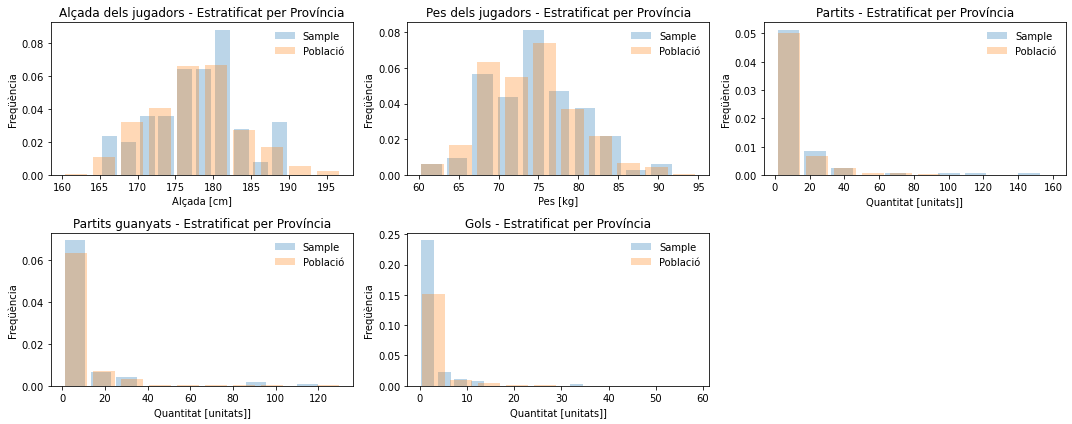

In [207]:
# Comparatives visuals
fig=plt.figure(figsize=(15, 6))

ax = plt.subplot(2, 3, 1)
jugadors_estrat["Altura"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Altura"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Alçada dels jugadors - Estratificat per Província")
plt.ylabel("Freqüència")
plt.xlabel("Alçada [cm]")

ax = plt.subplot(2, 3, 2)
jugadors_estrat["Peso"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["Peso"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Pes dels jugadors - Estratificat per Província")
plt.ylabel("Freqüència")
plt.xlabel("Pes [kg]")

ax = plt.subplot(2, 3, 3)
jugadors_estrat["PT"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PT"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits - Estratificat per Província")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 4)
jugadors_estrat["PG"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["PG"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Partits guanyats - Estratificat per Província")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

ax = plt.subplot(2, 3, 5)
jugadors_estrat["G"].plot.hist(density=True, histtype='barstacked',bins=10, rwidth=0.8, alpha=0.3, label="Sample")
jugadors_filtre03["G"].plot.hist(density=True, histtype='barstacked', rwidth=0.8, alpha=0.3, label="Població")
leg = ax.legend(loc="upper right", frameon=False)
plt.title("Gols - Estratificat per Província")
plt.ylabel("Freqüència")
plt.xlabel("Quantitat [unitats]]")

plt.subplots_adjust(wspace=0.85, hspace=0.5, bottom=0.1)

fig.tight_layout()
plt.show()

Es pot observar com l'estratificació per Província accentua les diferències de totes les variables, incloses les de l'alçada i pes, però per a franjes molt concretes. Tanmateix, amb la informació estadística de tots dos dataframes, es pot concloure que les diferències destacables pels percentils 0.75 es troben en els Partits i Partits Guanyats. Això també es pot observar visualment, perquè la primera columna d'aquestes dues variables, es la que concentra més freqüència i a on es contempla una diferència més gran.
Amb la informació estadística, es pot concloure que la Mostra Estratificada és un mètode més representatiu de la Població que la Mostra Simple.

### Synthetic Minority Oversampling Technique (SMOTE)
A problem with imbalanced classification is that there are too few examples of the minority class for a model to effectively learn the decision boundary.
One way to solve this problem is to oversample the examples in the minority class. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model.
An improvement on duplicating examples from the minority class is to synthesize new examples from the minority class. This is a type of data augmentation for tabular data and can be very effective.

Aplicarem el mètode SMOTE amb l'alçada dels jugadors per província

In [208]:
#Importem la llibreria imbalanced learn i la llibreria per generar la mostra aleatòria
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [209]:
print(jugadors_filtre04.info())
print(jugadors_filtre04.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 656 entries, 123 to 962
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Nombre     656 non-null    object 
 1   Provincia  656 non-null    object 
 2   PT         656 non-null    int64  
 3   PG         656 non-null    int64  
 4   G          656 non-null    int64  
 5   Altura     656 non-null    float64
 6   Peso       654 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 41.0+ KB
None
               PT          PG           G      Altura        Peso
count  656.000000  656.000000  656.000000  656.000000  654.000000
mean    11.079268    8.381098    1.963415  177.608232   73.915902
std     19.301777   15.307970    5.158721    6.033787    5.713472
min      0.000000    0.000000    0.000000  160.000000   60.000000
25%      1.000000    1.000000    0.000000  173.000000   70.000000
50%      4.000000    3.000000    0.000000  178.000000   74.000000
75% 

In [210]:
#Afegim una columna amb el sumatori de jugadors per província
jugadors05=jugadors_filtre04.copy()
jugadors05["compta"]=int(1)
jugadors05["total_prov"]=jugadors05.groupby("Provincia")["compta"].transform("sum")
print(jugadors05)

                          Nombre  Provincia   PT   PG   G  Altura  Peso  \
123         Marcos Vales Illanes   A Coruña    0    1   0   181.0  77.0   
124              Juan Acuña Naya   A Coruña    0    1   0   179.0  88.0   
125  José María Martín Rodríguez   A Coruña    1    1   0   176.0  74.0   
127     Francisco Casilla Cortés  Tarragona    0    0   0   192.0  83.0   
128    Juan Ginés Sánchez Romero   Valencia    0    0   0   173.0  72.0   
..                           ...        ...  ...  ...  ..     ...   ...   
958         Andrés Iniesta Luján   Albacete  105   96  13   171.0  68.0   
959       Sergio Busquets Burgos  Barcelona  119   94   2   189.0  76.0   
960       Xavier Hernández Creus  Barcelona  108  100  13   170.0  68.0   
961      Iker Casillas Fernández     Madrid  154  121   0   182.0  80.0   
962          Sergio Ramos García    Sevilla  161  131  23   184.0  83.0   

     compta  total_prov  
123       1          12  
124       1          12  
125       1          

In [211]:
#Acotem l'estudi a les columnes que ens interessen
jugadors06=jugadors05[jugadors05.total_prov>1].copy()
print(jugadors06.info())
print(jugadors06.head())
print(jugadors06["Provincia"].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 123 to 962
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nombre      648 non-null    object 
 1   Provincia   648 non-null    object 
 2   PT          648 non-null    int64  
 3   PG          648 non-null    int64  
 4   G           648 non-null    int64  
 5   Altura      648 non-null    float64
 6   Peso        646 non-null    float64
 7   compta      648 non-null    int64  
 8   total_prov  648 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 50.6+ KB
None
                          Nombre  Provincia  PT  PG  G  Altura  Peso  compta  \
123         Marcos Vales Illanes   A Coruña   0   1  0   181.0  77.0       1   
124              Juan Acuña Naya   A Coruña   0   1  0   179.0  88.0       1   
125  José María Martín Rodríguez   A Coruña   1   1  0   176.0  74.0       1   
127     Francisco Casilla Cortés  Tarragona   0   0  0 

In [212]:
#Farem servir les províncies amb menys representació, <=10, per crear el dataframe a partir dels menys freqüents
jugadors07 = jugadors06[(jugadors06["total_prov"] <=10)].copy()
print(jugadors07)
print(jugadors07["Provincia"].unique())
print(jugadors07.describe())

                          Nombre    Provincia   PT  PG   G  Altura  Peso  \
127     Francisco Casilla Cortés    Tarragona    0   0   0   192.0  83.0   
133        Antonio Álvarez Pérez      Badajoz    0   1   0   175.0  70.0   
134           Javier Planas Abad       Huesca    1   1   0   174.0  74.0   
138     Antonio González Álvarez       Málaga    0   0   0   172.0  72.0   
139    Álvaro Fernández Llorente     La Rioja    1   1   0   186.0  80.0   
..                           ...          ...  ...  ..  ..     ...   ...   
945  José Antonio Camacho Alfaro       Murcia   79  40   0   174.0  70.0   
948         Fernando Ruiz Hierro       Málaga   81  52  29   187.0  84.0   
950       Carles Puyol Saforcada       Lleida   94  70   3   178.0  78.0   
957    Andoni Zubizarreta Urreta  Araba/Álava  125  70   0   187.0  86.0   
958         Andrés Iniesta Luján     Albacete  105  96  13   171.0  68.0   

     compta  total_prov  
127       1           7  
133       1           9  
134      

In [213]:
#A les províncies <=5 les direm 0, i les altres 1. També eliminem les columnes que no són numèriques
jugadors07["Provincia02"] = [0 if x <=5 else 1 for x in jugadors07["total_prov"] ]
jugadors08=jugadors07.iloc[:,[5,6,8,9]].copy()
print(jugadors08)
print(jugadors08["Provincia02"].value_counts())
print(jugadors08["Provincia02"].describe())

     Altura  Peso  total_prov  Provincia02
127   192.0  83.0           7            1
133   175.0  70.0           9            1
134   174.0  74.0           2            0
138   172.0  72.0           8            1
139   186.0  80.0           7            1
..      ...   ...         ...          ...
945   174.0  70.0           7            1
948   187.0  84.0           8            1
950   178.0  78.0           7            1
957   187.0  86.0           5            0
958   171.0  68.0           3            0

[162 rows x 4 columns]
1    109
0     53
Name: Provincia02, dtype: int64
count    162.000000
mean       0.672840
std        0.470631
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Provincia02, dtype: float64


In [214]:
#Comrpovem la correcta aplicació de l'anivellament
smote = SMOTE(sampling_strategy = "minority")
X_smote, y_smote = smote.fit_resample(jugadors08, jugadors08["Provincia02"])
print(X_smote)
print(X_smote["Provincia02"].value_counts())

         Altura       Peso  total_prov  Provincia02
0    192.000000  83.000000           7            1
1    175.000000  70.000000           9            1
2    174.000000  74.000000           2            0
3    172.000000  72.000000           8            1
4    186.000000  80.000000           7            1
..          ...        ...         ...          ...
213  179.771669  77.771669           5            0
214  165.368969  70.000000           2            0
215  184.467049  83.467049           4            0
216  180.416921  78.611280           5            0
217  175.000000  71.299010           3            0

[218 rows x 4 columns]
1    109
0    109
Name: Provincia02, dtype: int64


## Exercici 3. Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

De la web dels apunts: https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c

*Say you have a stream of items of large and unknown length that we can only iterate over once.
Create an algorithm that randomly chooses an item from this stream such that each item is equally likely to be selected.*

In [215]:
import random
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = jugadors_filtre04["Altura"]

k=130
reservoir = []
for i, element in enumerate(jugadors_filtre04["Altura"]):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability: 
             reservoir[random.choice(range(0,k))] = element
            
print(reservoir)
print("-------------")
print("Longitud de la llista ha de ser = k: " + str(len(reservoir)))

[182.0, 179.0, 178.0, 182.0, 187.0, 179.0, 167.0, 180.0, 183.0, 172.0, 170.0, 172.0, 182.0, 179.0, 178.0, 174.0, 180.0, 177.0, 191.0, 178.0, 181.0, 171.0, 175.0, 185.0, 180.0, 168.0, 170.0, 174.0, 180.0, 171.0, 165.0, 187.0, 176.0, 180.0, 180.0, 180.0, 168.0, 184.0, 197.0, 172.0, 179.0, 184.0, 176.0, 175.0, 173.0, 178.0, 177.0, 170.0, 175.0, 182.0, 173.0, 165.0, 181.0, 171.0, 169.0, 177.0, 174.0, 179.0, 181.0, 176.0, 184.0, 170.0, 182.0, 169.0, 165.0, 180.0, 185.0, 176.0, 173.0, 180.0, 172.0, 167.0, 178.0, 182.0, 181.0, 170.0, 182.0, 174.0, 180.0, 188.0, 179.0, 170.0, 177.0, 178.0, 176.0, 175.0, 183.0, 171.0, 172.0, 179.0, 184.0, 180.0, 179.0, 185.0, 173.0, 183.0, 179.0, 177.0, 173.0, 170.0, 176.0, 195.0, 178.0, 189.0, 167.0, 174.0, 190.0, 186.0, 176.0, 171.0, 182.0, 189.0, 170.0, 167.0, 176.0, 176.0, 172.0, 175.0, 174.0, 169.0, 182.0, 183.0, 178.0, 190.0, 174.0, 178.0, 181.0, 179.0, 170.0, 188.0]
-------------
Longitud de la llista ha de ser = k: 130


In [216]:
a2, b2, c2 = min(reservoir), max(reservoir), round(sum(reservoir)/len(reservoir),2)
print('Reservoir sampling: Altura mínima és {} cm, màxima és {} cm i mitjana és {} cm.'.format(a2, b2, c2))

Reservoir sampling: Altura mínima és 165.0 cm, màxima és 197.0 cm i mitjana és 177.42 cm.


In [217]:
a, b, c = jugadors07["Altura"].min(), jugadors07["Altura"].max(), round(jugadors07["Altura"].sum()/len(jugadors07["Altura"]),2)
print('Població original: Altura mínima és {} cm, màxima és {} cm i mitjana és {} cm.'.format(a, b, c))

Població original: Altura mínima és 164.0 cm, màxima és 197.0 cm i mitjana és 177.21 cm.


Observem que la diferència entre el Reservoir sampling i la Població és pràcticament nula en l'alçada mínima i mitjana, però de 2 cm en la màxima.